In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/Data_for_Values.csv')
df

,Country,Age,Salary,Purchased
0,France,44,72000,No
1,Spain,27,48000,Yes
2,Germany,30,54000,No
3,Spain,38,61000,No
4,Germany,40,45000,Yes
5,France,35,58000,Yes
6,Spain,38,52000,No
7,France,48,79000,Yes
8,Germany,50,83000,No
9,France,37,67000,Yes


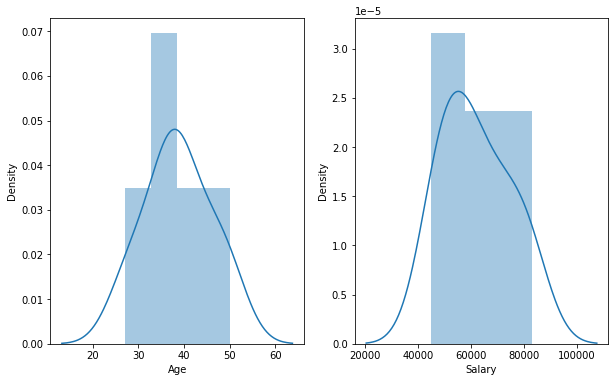

In [5]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(df['Age'])
plt.subplot(1,2,2)
sns.distplot(df['Salary'])
plt.show()

In [6]:
df['Age'].skew(), df['Salary'].skew()

(0.02977338987798317, 0.41229980131480715)

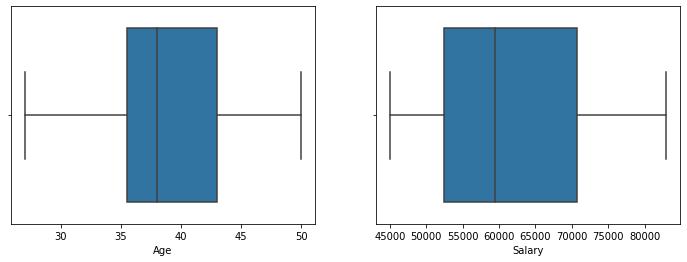

In [11]:
# sử dụng MinMaxScaler ==> Không có outlier
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(df['Age'])
plt.subplot(1,2,2)
sns.boxplot(df['Salary'])
plt.show()

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
df_new = df[['Age', 'Salary']]
df_new

,Age,Salary
0,44,72000
1,27,48000
2,30,54000
3,38,61000
4,40,45000
5,35,58000
6,38,52000
7,48,79000
8,50,83000
9,37,67000


In [15]:
df_scale = scaler.fit_transform(df_new)
df_scale = pd.DataFrame(df_scale, columns=df_new.columns)
df_scale

,Age,Salary
0,0.739130,0.710526
1,0.000000,0.078947
2,0.130435,0.236842
3,0.478261,0.421053
4,0.565217,0.000000
5,0.347826,0.342105
6,0.478261,0.184211
7,0.913043,0.894737
8,1.000000,1.000000
9,0.434783,0.578947


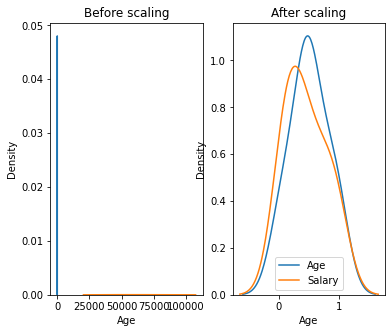

In [18]:
f, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(6,5))
sns.kdeplot(df['Age'], ax = ax1, label='Age')
sns.kdeplot(df['Salary'], ax = ax1, label='Salary')
ax1.set_title('Before scaling')
sns.kdeplot(df_scale['Age'], ax = ax2, label='Age')
sns.kdeplot(df_scale['Salary'], ax = ax2, label='Salary')
ax2.set_title('After scaling')
plt.legend()
plt.show()

In [19]:
print('Age before scaling:', df['Age'].min(), df['Age'].max())
print('Age after scaling:', df_scale['Age'].min(), df_scale['Age'].max())

Age before scaling: 27 50
Age after scaling: 0.0 1.0


In [20]:
print('Salary before scaling:', df['Salary'].min(), df['Salary'].max())
print('Salary after scaling:', df_scale['Salary'].min(), df_scale['Salary'].max())

Salary before scaling: 45000 83000
Salary after scaling: 0.0 0.9999999999999998


In [21]:
print('Before scaling:')
df_new.corr()

Before scaling:


,Age,Salary
Age,1.00000,0.79338
Salary,0.79338,1.00000


In [22]:
print('After scaling:')
df_scale.corr()

After scaling:


,Age,Salary
Age,1.00000,0.79338
Salary,0.79338,1.00000
